# HEALTH DATA ANALYSIS 

This project is carried out to analyse and model health data to provide recommendations about how the life of citizens can be improved

In [ ]:
#import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt  
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score


In [ ]:
def read_file(file):
    """
    converts csv file to dataframe
    returns: dataframe object
    """
    df = pd.read_csv(file)
    df.columns = [col.strip() for col in df.columns]
    
    return df

In [ ]:
#specify directory path to read files from
path = "/content/drive/MyDrive/DataHealthProfiles"

#get the names of all files in path 
files = [os.path.join(path, file) for file in os.listdir(path) if file.endswith("csv")]
files[:3]

['/content/drive/MyDrive/DataHealthProfiles/IncidenceofmalignantmelanomaCSV.csv',
 '/content/drive/MyDrive/DataHealthProfiles/AdultssmokingCSV.csv',
 '/content/drive/MyDrive/DataHealthProfiles/AcutesexuallytransmittedinfectionsCSV.csv']

In [ ]:
"""
combining the indicator value column from each file into one large dataframe
"""
#create an empty dataframe
indVal_df = pd.DataFrame()

#concatenate the indicator value column in each file (bar the first file) with created dataframe
for i in range(1, len(files)):
  prep_df = read_file(files[i])
  indVal_df = pd.concat([indVal_df, prep_df['Indicator value'].to_frame()], axis=1)
  

In [ ]:
#convert the first file which was skipped in the for loop to a dataframe
df_0 = read_file(files[0])

#merge the dataframes
new_df = pd.concat([df_0, indVal_df], axis=1)

new_df.head(2)


,ONS Code (old),ONS Code (new),Area Name,ONS Cluster,Period,Aggregate Numerator,Aggregate Denominator,Single Year Numerator,Single Year Denominator,Indicator value,...,Indicator value,Indicator value,Indicator value,Indicator value,Indicator value,Indicator value,Indicator value,Indicator value,Indicator value,Indicator value
0,Eng,E92000001,England,NaN,2008 - 10,23056.0,143322008.0,7685.0,47774003.0,14.50,...,21.087867,41.904076,13.307570,200.660814,74.762376,2.314206,34.01751,30.072941,13.597446,41.077650
1,A,E12000001,North East,NaN,2008 - 10,1080.0,7133016.0,360.0,2377672.0,13.45,...,24.793613,35.203446,20.250416,257.993272,59.143289,1.618705,42.61009,28.081351,10.490294,41.361602


### Data Preparation

In [ ]:
#specifying the column names so we can identify each indicator value 
column_names  = [
        'ONS Code (old)', 'ONS Code (new)', 'Area Name', 'ONS Cluster',
        'Period', 'Aggregate Numerator', 'Aggregate Denominator',
        'Single Year Numerator', 'Single Year Denominator', 'indicator_melanoma', 'Lower 95% CI', 'Upper 95% CI', 'Significance',
         'indicator_adults_smoking', 'indicator_Acutesexuallytransmittedinfection', 'indicator_Alcoholspecifichospitalstaysunder18',
        'indicator_Allageallcausemortalityaggregatetrend', 'indicator_Allethnicgroups', 'indicator_Asian', 
        'indicator_Averagedeprivedquintile', 'indicator_Black', 'indicator_Chinese', 'indicator_Deprivation',
        'indicator_Drug_Misuse', 'indicator_Earlydeathscanceraggregatetrend', 'indicator_Earlydeathscancer', 
        'indicator_Earlydeathsheartdiseaseandstroke', 'indicator_Earlydeathsheartdiseasestrokeaggregatetrend', 'indicator_Excesswinterdeaths',
         'indicator_GCSEachieved5ACincEngMaths','indicator_Healthyeatingadults', 'indicator_Hipfracturein65sandover', 
         'indicator_Hospitalstaysforalcoholrelatedharm', 'indicator_Hospitalstaysforselfharm','indicator_Increasingandhigherriskdrinking',
          'indicator_LeastdeprivedquintileCSV', 'indicator_InfantdeathsCSV', 'indicator_Lessdeprivedquintile', 'indicator_Lifeexpectancyfemale',
          'indicator_Lifeexpectancymale', 'indicator_LongtermunemploymentCSV', 'indicator_Mixed', 'indicator_Moredeprivedquintile', 
          'indicator_Mostdeprivedquintile', 'indicator_Newcasesoftuberculosis', 'indicator_Obeseadults',
           'indicator_Other', 'indicator_Peoplediagnosedwithdiabetes', 'indicator_Physicallyactiveadults', 'indicator_Proportionofchildreninpoverty',
          'indicator_Roadinjuriesanddeaths', 'indicator_Smokinginpregnancy', 'indicator_Smokingrelateddeaths', 'indicator_Startingbreastfeeding',
           'indicator_Statutoryhomelessness', 'indicator_Teenagepregnancyunder18', 'indicator_Unknown', 
           'indicator_Violentcrime', 'indicator_White' 
       ]

new_df.columns = column_names

new_df.columns = [column.replace("indicator_", "") for column in column_names ]
# new_df.columns

In [ ]:
new_df.head()

,ONS Code (old),ONS Code (new),Area Name,ONS Cluster,Period,Aggregate Numerator,Aggregate Denominator,Single Year Numerator,Single Year Denominator,melanoma,...,Proportionofchildreninpoverty,Roadinjuriesanddeaths,Smokinginpregnancy,Smokingrelateddeaths,Startingbreastfeeding,Statutoryhomelessness,Teenagepregnancyunder18,Unknown,Violentcrime,White
0,Eng,E92000001,England,NaN,2008 - 10,23056.0,143322008.0,7685.0,47774003.0,14.50,...,21.087867,41.904076,13.307570,200.660814,74.762376,2.314206,34.017510,30.072941,13.597446,41.077650
1,A,E12000001,North East,NaN,2008 - 10,1080.0,7133016.0,360.0,2377672.0,13.45,...,24.793613,35.203446,20.250416,257.993272,59.143289,1.618705,42.610090,28.081351,10.490294,41.361602
2,B,E12000002,North West,NaN,2008 - 10,3327.0,19102435.0,1109.0,6367478.0,15.72,...,22.897068,41.947291,17.221996,245.262430,63.090260,1.427598,39.232100,38.323659,13.320357,42.952069
3,D,E12000003,Yorkshire and the Humber,NaN,2008 - 10,2203.0,14563461.0,734.0,4854487.0,13.87,...,22.000930,46.598772,16.635976,228.362152,69.327262,2.224240,39.128965,29.587915,11.534529,42.024993
4,E,E12000004,East Midlands,NaN,2008 - 10,2052.0,12302882.0,684.0,4100961.0,14.66,...,19.285840,49.011875,15.841658,194.043115,73.416349,2.028908,33.848403,26.874742,13.364350,40.349413


In [ ]:
#create a copy of the dataframe to be used for analysis 
df = new_df.copy()
df.drop(columns=[
                'ONS Code (old)', 'ONS Cluster', 'Aggregate Numerator', 'Aggregate Denominator',
                 'Single Year Numerator', 'Single Year Denominator', 'Significance'
                 ], inplace=True )

df.to_csv("health_data.csv")

# EXPLORATORY DATA ANALYSIS

#### Exploring Life Expectancy 

Our dependent variable for this project will be Life Expectancy. 
We will be seeing how different health indicators affect life expectancy and how we can improve life expectancy of the UK citizens.



In [ ]:
plt.rcParams["figure.figsize"] = (20, 10) #set figure size of all plots
plt.rcParams['axes.titlesize'] = 16 #set title size for all plots


Text(0.5, 1.0, 'Life Expectancy of People ')

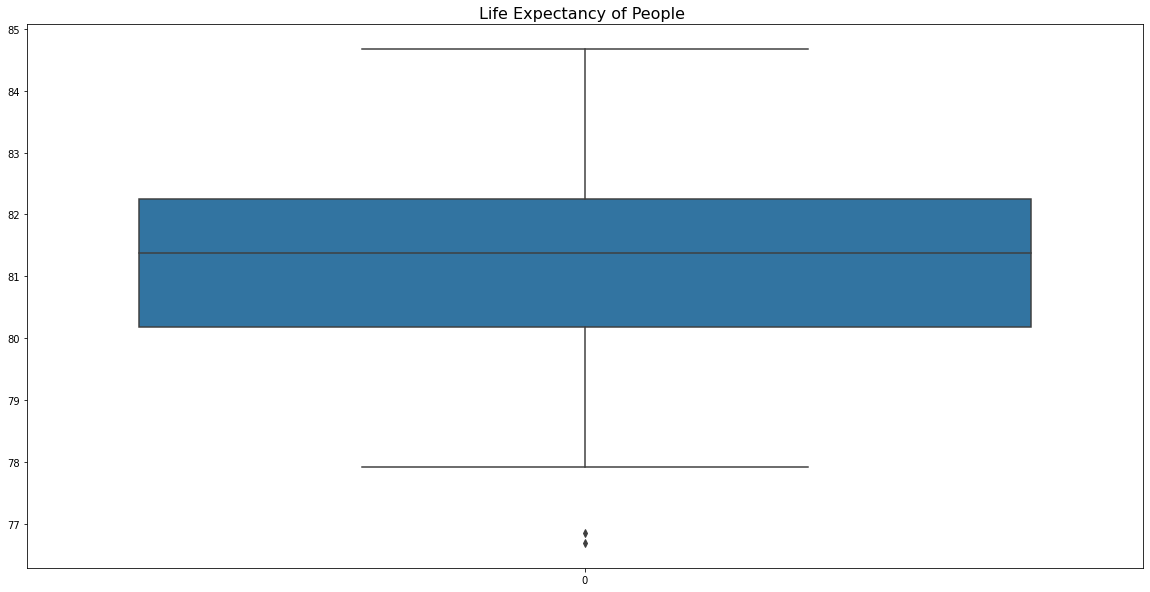

In [ ]:
# plt.figure(figsize= (15, 7))
#combining male and female life expectancy 
df["Lifeexpectancy"] = (df['Lifeexpectancyfemale'] + df['Lifeexpectancymale']) / 2

#visualizing the lifeexpectancy column
sns.boxplot(df['Lifeexpectancy'])
plt.title("Life Expectancy of People ")


 The boxplot above shows us the life expectancy of people in the uk. We can infer from this plot that:
 - Life expectancy is between ages 78 and 85, 
 - The average life expectancy is between 81 and 82
 - There are two outliers in the data where life expectancy fell just under the 
  common age range

 Let's explore how various health indicators affect Life Expectancy.
<!-- <br>
The indicators we will be focusing on include:
- Drug Misuse 
- Adult Smoking 
- Increased Higher Risk Drinking 
- Violent Crime
- Obesity
- Deprivation

Intuitively, these indicators sh -->

Text(0.5, 0, 'Obesity')

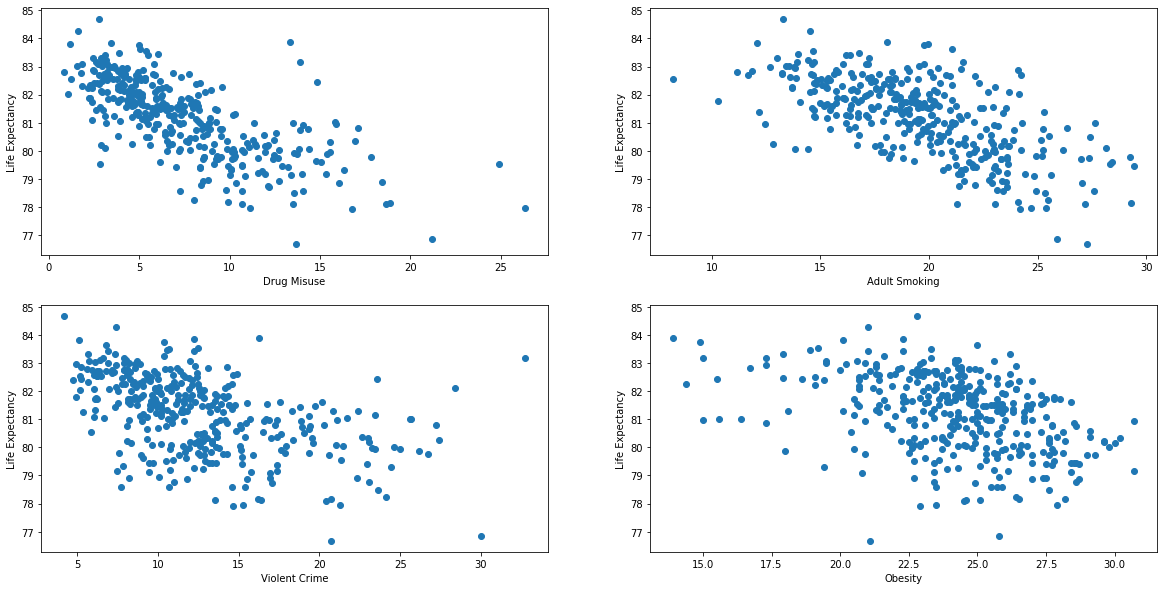

In [ ]:
plt.subplot(2,2,1)
plt.scatter(df['Drug_Misuse'], df['Lifeexpectancy'])
plt.ylabel("Life Expectancy")
plt.xlabel("Drug Misuse")

plt.subplot(2,2,2)
plt.scatter(df['adults_smoking'], df['Lifeexpectancy'])
plt.ylabel("Life Expectancy")
plt.xlabel("Adult Smoking")

plt.subplot(2,2,3)
plt.scatter(df['Violentcrime'], df['Lifeexpectancy'])
plt.ylabel("Life Expectancy")
plt.xlabel("Violent Crime")

plt.subplot(2,2,4)
plt.scatter(df['Obeseadults'], df['Lifeexpectancy'])
plt.ylabel("Life Expectancy")
plt.xlabel("Obesity")

In the plots above, we explored how Drug Misuse, Adult Smoking, Violent Crime and Obesity affect Life Expectancy.

From the plots, we can infer that:
- Life Expectancy reduces significantly as drug misuse increases
- Adult smoking generally reduces life expectancy 
- There is no strong inidcation that violent crimes directly affects life expectancy
- Obesity has no significant impact on life expectancy 

- From these inferences, we can conclude that Drug Misuse and Adult smoking can lower life expectancy. These activities should be reduced or stopped entirely to increase or maintain a high life expectancy. 
- Although Obesity does not seem to play any role life expectancy, there is a high chance of being diagnosed with diabetes if you are obese, theefore it is
beneficial to engage in activities that reduce obesity, such as eating healthy.



Text(0.5, 0, 'High Risk Drinkers')

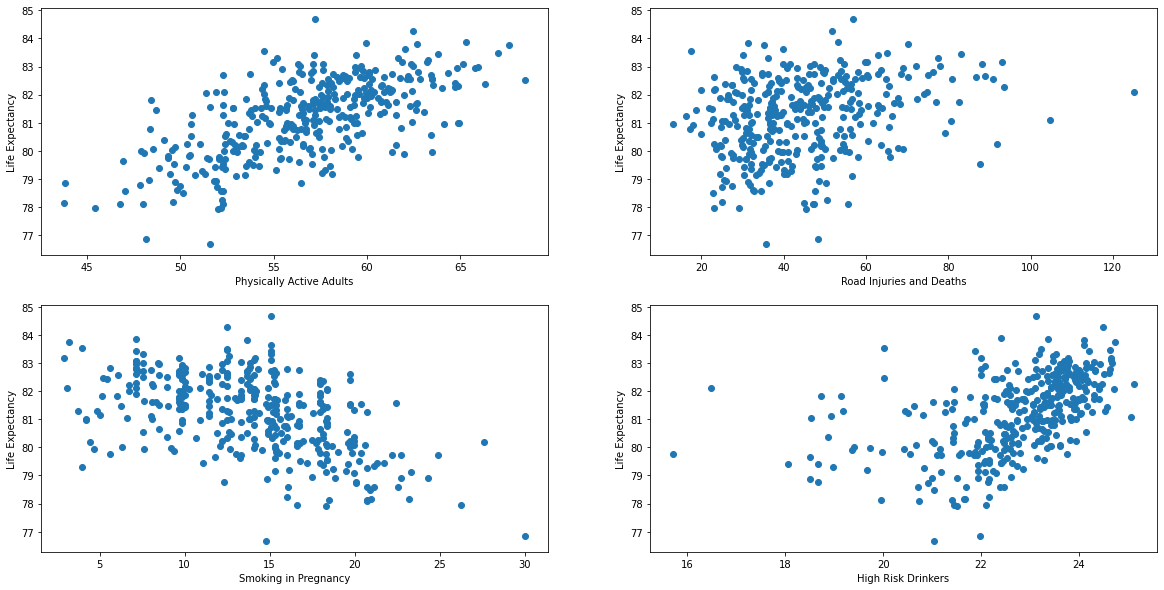

In [ ]:
plt.subplot(2,2,1)
plt.scatter(df['Physicallyactiveadults'], df['Lifeexpectancy'])
plt.ylabel("Life Expectancy")
plt.xlabel("Physically Active Adults")

plt.subplot(2,2,2)
plt.scatter(df['Roadinjuriesanddeaths'], df['Lifeexpectancy'])
plt.ylabel("Life Expectancy")
plt.xlabel("Road Injuries and Deaths")

plt.subplot(2,2,3)
plt.scatter(df['Smokinginpregnancy'], df['Lifeexpectancy'])
plt.ylabel("Life Expectancy")
plt.xlabel("Smoking in Pregnancy")

plt.subplot(2,2,4)
plt.scatter(df['Increasingandhigherriskdrinking'], df['Lifeexpectancy'])
plt.ylabel("Life Expectancy")
plt.xlabel("High Risk Drinkers")

In the plots above, we explored how the following indicators affect Life Expectancy: <br>
Physical Activity, Road Injuries, Smoking in Pregnancy and High Risk Drinking

From the plots, we can infer that:
- Physically active adults tend to have a higher life expectancy 
- Road Injuries did not affect life expectancy in any way 
- Smoking during pregnancy does not significantly affect life expectancy 
- Life expectancy reduces significantly as high risk drinking increases
<br>
<br>

- We can conclude that people that engage in physical activity usually have life expectancy 
- People who are high risk drinkers are in danger of having low life expectancy
- Smoking while pregnant, although not an indicator of low life expectancy, can still have many negative effects


Text(0.5, 0, 'Hospital Admissions for Self Harm')

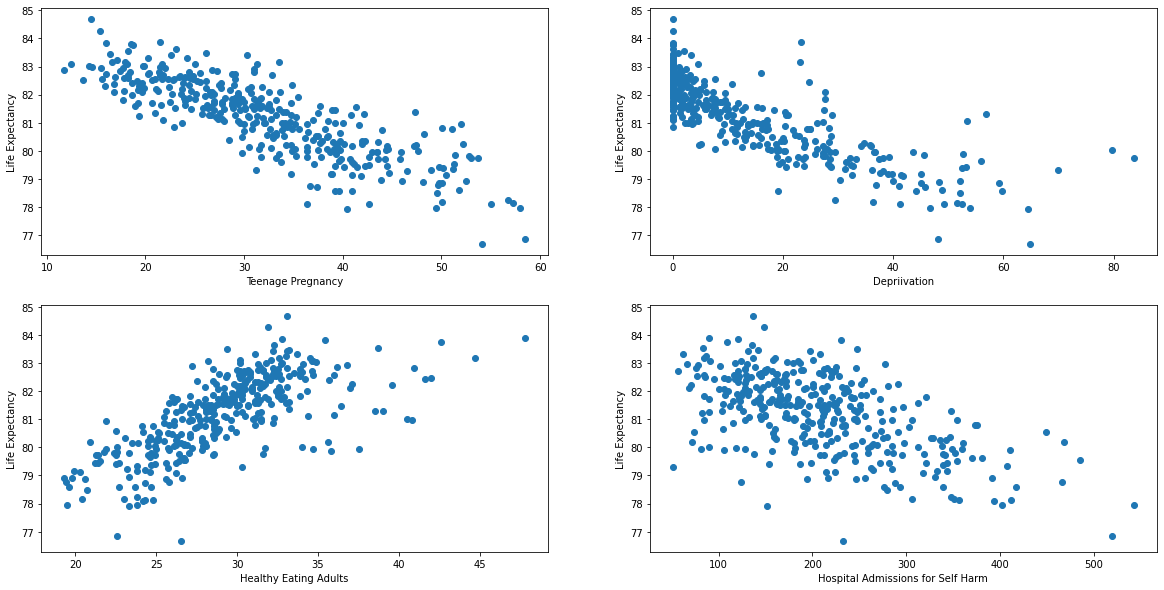

In [ ]:
plt.subplot(2,2,1)
plt.scatter(df['Teenagepregnancyunder18'], df['Lifeexpectancy'])
plt.ylabel("Life Expectancy")
plt.xlabel("Teenage Pregnancy")

plt.subplot(2,2,2)
plt.scatter(df['Deprivation'], df['Lifeexpectancy'])
plt.ylabel("Life Expectancy")
plt.xlabel("Depriivation")

plt.subplot(2,2,3)
plt.scatter(df['Healthyeatingadults'], df['Lifeexpectancy'])
plt.ylabel("Life Expectancy")
plt.xlabel("Healthy Eating Adults")

plt.subplot(2,2,4)
plt.scatter(df['Hospitalstaysforselfharm'], df['Lifeexpectancy'])
plt.ylabel("Life Expectancy")
plt.xlabel("Hospital Admissions for Self Harm")

In the plots above, we explored how the following indicators affect Life Expectancy: <br>
Teenage Pregnancy, Deprivation, Healthy Eating and Breastfeeding

From the plots, we can infer that:
- Teengae pregnancy has a strong negative correlation with life expectancy 
- Deprived areas tend to see a shorter life span than non-deprived areas
- Healthy eating adults generally have a higher life expectancy than adults who do not eat healthy
- Life expectancy reduces significantly as high risk drinking increases
- There is some significance that excessive self harm which leads to hospital admissions reduces life expectancy 
<br>
<br>

From these inferences, we can conclude that:
- Reducing the rate of teenage pregnancy can significantly increase life expectancy 
- Living in deprived areas can singlehandedly mean reduced life expectancy 
- Healthy eating adults generally have a high life expectancy 
- Self harm that leads to hospital admissions can be detrimental to having good life expectancy



Text(0.5, 0, 'Diabetes')

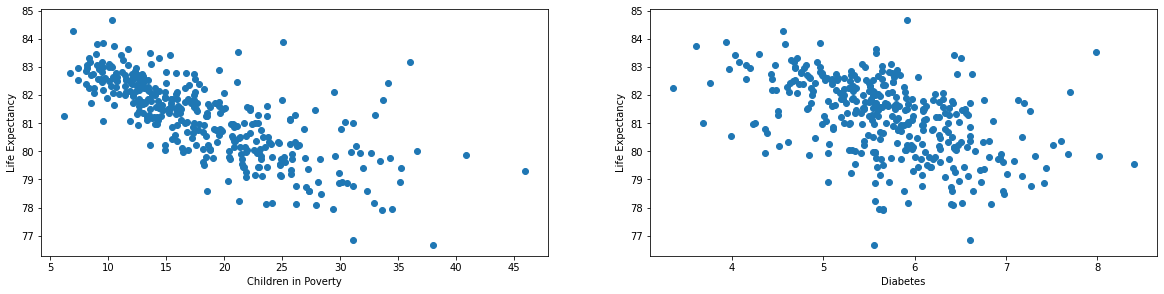

In [ ]:
plt.subplot(2,2,1)
plt.scatter(df['Proportionofchildreninpoverty'], df['Lifeexpectancy'])
plt.ylabel("Life Expectancy")
plt.xlabel("Children in Poverty")

plt.subplot(2,2,2)
plt.scatter(df['Peoplediagnosedwithdiabetes'], df['Lifeexpectancy'])
plt.ylabel("Life Expectancy")
plt.xlabel("Diabetes")

In the plots above, we explored how "children living in poverty" and "diabetes"
affect life expectancy.

From the plots, we can infer that:
- Children in poverty generally have a lower life expectancy 
- Diabetes and Life expectancy do not have any correlation 

Conclusion:
- Poverty plays a significant role in reducing the life expectancy of children
- There is no substantial evidence that diabetes affects life expectancy in any way  


### Data Preparation for Model Building

In [ ]:
#creating a new dataframe with relevant columns for our analysis 
life_exp_df = df[[
                  'Lifeexpectancy', 'Healthyeatingadults', 'Deprivation', 'Teenagepregnancyunder18', 
                  'Peoplediagnosedwithdiabetes', 'Proportionofchildreninpoverty', 'Increasingandhigherriskdrinking',
                  'Smokinginpregnancy', 'Roadinjuriesanddeaths', 'Physicallyactiveadults', 'Obeseadults',
                  'Violentcrime', 'adults_smoking', 'Drug_Misuse'

                  ]]

#drop empty rows
life_exp_df = life_exp_df.dropna()

In [ ]:
def corr_check(df):
  """
  checks correlation between lifeexpectancy and every other column
  returns: correlation values
  """
  life_exp = df['Lifeexpectancy']
  df.drop(columns="Lifeexpectancy")
  for col in df.columns:
    corr = life_exp.corr(df[col])
    print(f"{col}: {corr:.2f}")

corr_check(life_exp_df)

Lifeexpectancy: 1.00
Healthyeatingadults: 0.70
Deprivation: -0.81
Teenagepregnancyunder18: -0.82
Peoplediagnosedwithdiabetes: -0.47
Proportionofchildreninpoverty: -0.73
Increasingandhigherriskdrinking: 0.50
Smokinginpregnancy: -0.52
Roadinjuriesanddeaths: 0.26
Physicallyactiveadults: 0.64
Obeseadults: -0.40
Violentcrime: -0.48
adults_smoking: -0.65
Drug_Misuse: -0.72


<Axes: >

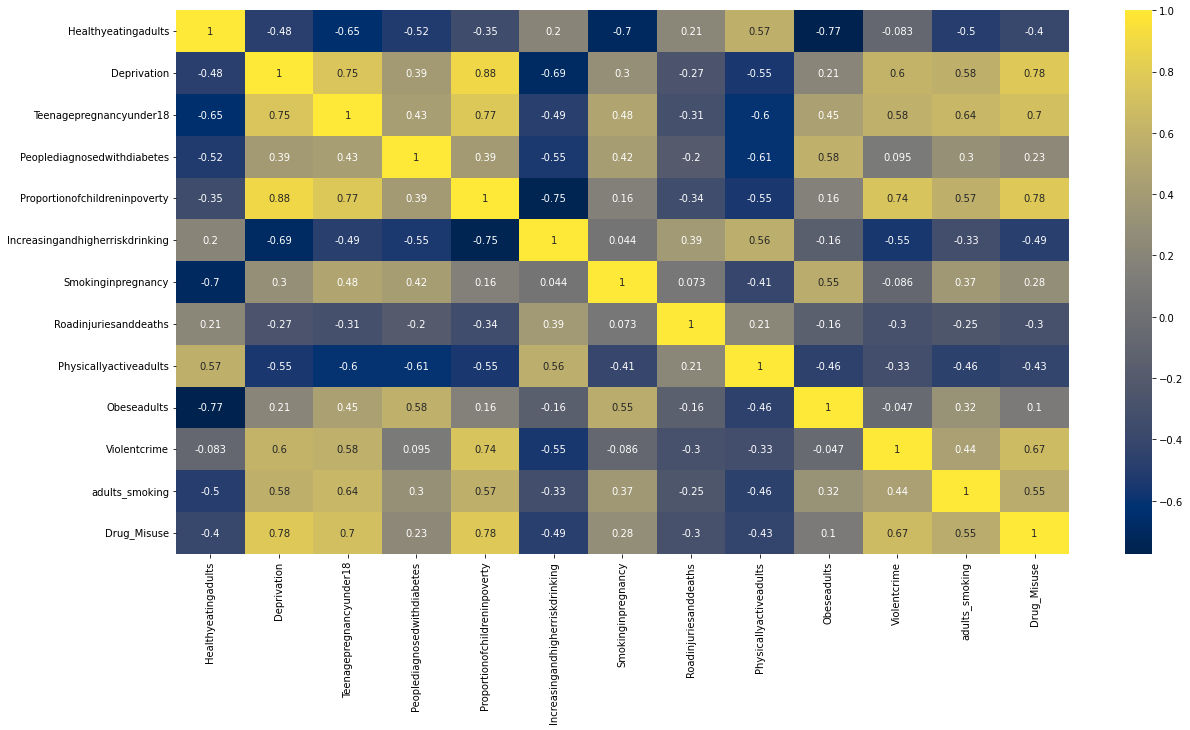

In [ ]:
#creating a heatmap to see correlation between all the columns 
sns.heatmap(life_exp_df.drop(columns="Lifeexpectancy").corr(), annot=True, cmap="cividis")

From the heatmap and using 0.7 as a treshold,  we can eliminate columns that exhibit high multicollinearity which could affect the accuracy of our model

In [ ]:
#drop columns that exhibit high multicollinearity 
life_exp_df = life_exp_df.drop(columns = ["Obeseadults", "Smokinginpregnancy", "Deprivation", "Violentcrime"])

Since the data has a range of different values, we normalize it using Min Max Scaler. MinMaxScaler keeps the shape of the data and since we have very little case of outliers, it presents a good normalization measure 

In [ ]:
""" Normalizing the dataset using standard scaler"""
#creating an instance of standard scaler
scaler = MinMaxScaler()

#applying standard scaler to dataframe
life_exp_df = pd.DataFrame(scaler.fit_transform(life_exp_df), columns = life_exp_df.columns)
life_exp_df.head()

,Lifeexpectancy,Healthyeatingadults,Teenagepregnancyunder18,Peoplediagnosedwithdiabetes,Proportionofchildreninpoverty,Increasingandhigherriskdrinking,Roadinjuriesanddeaths,Physicallyactiveadults,adults_smoking,Drug_Misuse
0,0.527324,0.370079,0.476498,0.476672,0.374534,0.703117,0.257406,0.496242,0.554151,0.304030
1,0.352682,0.086614,0.660318,0.551868,0.467774,0.716458,0.197614,0.409289,0.613918,0.386234
2,0.347497,0.271654,0.588053,0.532218,0.420055,0.710806,0.257792,0.393600,0.653293,0.386028
3,0.422484,0.204724,0.585847,0.505450,0.397507,0.687444,0.299299,0.465444,0.657692,0.367201
4,0.509555,0.366142,0.472881,0.541762,0.329193,0.722651,0.320832,0.505343,0.547525,0.287155


Model Building

Here we go ahead to build a model that can predict life expectancy based on certain independent variables as we have seen in our analysis 

In [31]:
def run_model(model_name, print_values = True):
    """
    receives a machine learning model and returns its metrics
    print_values = 1: print the results of the calculated metrics
    return_predictions = 1: returns the y predictions together with the metrics
    """
    model_name.fit(X_train, y_train)
    y_predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_predictions)
    mse = mean_squared_error(y_test, y_predictions)
    rmse = np.sqrt(mse)
    if print_values:
        print(f"MAE: {round(mae, 3)}")
        print(f"MSE: {round(mse, 3)}")
        print(f"RMSE: {round(rmse, 3)}")
    if return_predictions:
        return y_predictions, mae, mse, rmse
    return mae, mse, rmse

In [ ]:
#Splitting the data
X = life_exp_df.drop("Lifeexpectancy", axis=1)
y = life_exp_df['Lifeexpectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

### Linear Regression

In [32]:
lr = LinearRegression()
lr_mae, lr_mse, lr_rmse = run_model(lr)

MAE: 0.064
MSE: 0.007
RMSE: 0.084


# Final Recommendations
After in-depth analysis, We can conclude that life expectancy of citizens will grow if the following steps are taken:
- Increase in healthy eating habits 
- Measures should be taken to reduce teenage pregnancy 
- If the government pushes development in deprived areas, Life expectancy in such areas will grow 
- There should be higher regulation measures for drugs usage, as the abuse of drugs significantly lowers life expectancy
